In [1]:
%pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install rasterstats

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.5 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.5 MB 2.8 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/24.5 MB 3.0 MB/s eta 0:00:08
   --- ------------------------------------ 2.1/24.5 MB 3.1 MB/s eta 0:00:08
   ---- ----------------------------------- 2.9/24.5 MB 3.1 MB/s eta 0:00:07
   ------ --------------------------------- 3.7/24.5 MB 3.3 MB/s eta 0:00:07
   ------- -------------------------------- 4.5/24.5 MB 3.3 MB/s eta 0:00:07
   -------- ------------------------------- 5.0/24.5 MB 3.3 MB/s eta 0:00:06
   --------- ------------------------------ 5.8/24.5 MB 3.4 MB/s eta 0:00:06
   ---------- ----------------------------- 6.6/24.5 MB 3.4 MB/s eta 0:00:06
   ------------ --------------------------- 7.6/24.5 MB 3.5 MB/s eta 0:00:05
   ------------- -------------------------- 8.4/24.5 MB 3.6 MB/s eta 0:00:05
   ----------

# We import the shapefile data by districts of Peru

In [5]:
print("CWD:", os.getcwd())

CWD: d:\MIS DOCUMENTOS\Documents\GitHub\Raster_Analysis_Public_Policy_Streamlit\notebook


In [6]:
import os
import geopandas as gpd

shapefile_path = os.path.join("..", "data", "shape_file", "DISTRITOS.shp")
gdf = gpd.read_file(shapefile_path)
gdf.head()

IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry  
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...

In [7]:
%pip install rasterstats

  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
Using cached rasterstats-0.20.0-py3-none-any.whl (17 kB)

   ---------------------------------------- 2/2 [rasterstats]

Note: you may need to restart the kernel to use updated packages.


In [9]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterstats import zonal_stats

# Cargar shapefile
shapefile_path = os.path.join("..", "data", "shape_file", "DISTRITOS.shp")
gdf = gpd.read_file(shapefile_path)

gdf.head()

IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry  
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...

In [11]:
import rasterio

# Ruta al archivo
archivo = os.path.join("..", "data", "tmin_raster.tif")
#archivo = "tmin_raster.tif"

# Abrir el archivo
with rasterio.open(archivo) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)
    banda2 = src.read(2)
    banda3 = src.read(3)
    banda4 = src.read(4)
    banda5 = src.read(5)


Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|


- **Ancho: 285 píxeles**  
  Esto indica que el raster tiene 2853 columnas, es decir, 2853 celdas horizontales.

- **Alto: 397 píxeles**  
  Significa que tiene 397 filas, es decir, 397 celdas verticales.

- **Número de bandas: 5**  
  Cada banda puede representar una dimensión distinta del mismo fenómeno.

- **Sistema de coordenadas: EPSG:4326**

- **Transformación afín:**  
  Esto nos permite traducir las coordenadas de píxeles a coordenadas geográficas reales:

  - El valor `-81.38` indica la **longitud del borde izquierdo** del raster.
  - El valor `1.20` indica la **latitud del borde superior**.
  - El valor `0.05` nos dice que cada píxel equivale a **0.05 grados de longitud**.
  - El valor `-0.05` nos dice que cada fila de píxeles desciende en **0.05 grados de latitud**  
    (por eso es negativo: el raster se "construye" de arriba hacia abajo).




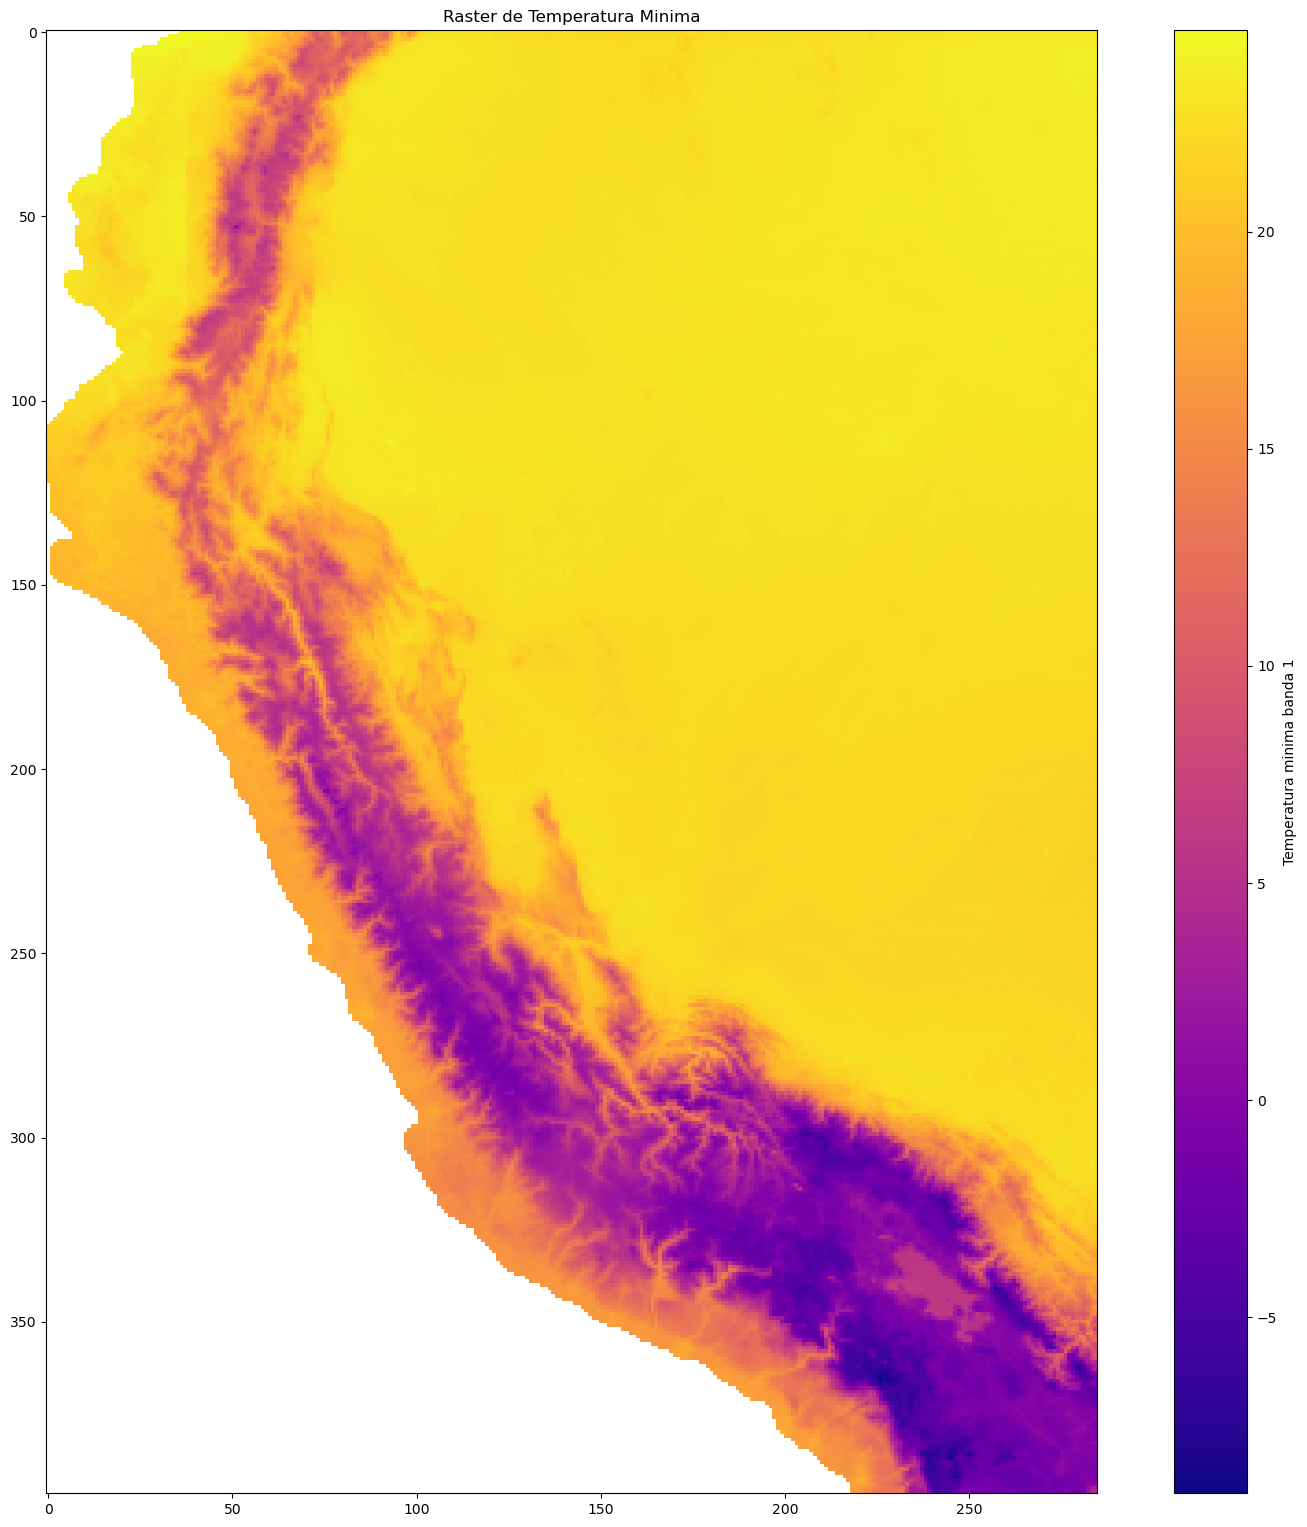

In [12]:
import matplotlib.pyplot as plt

# Ser curisoso
plt.figure(figsize=(20, 19))
plt.imshow(banda1, cmap='plasma')
plt.colorbar(label='Temperatura minima banda 1')
plt.title("Raster de Temperatura Minima")
plt.show()


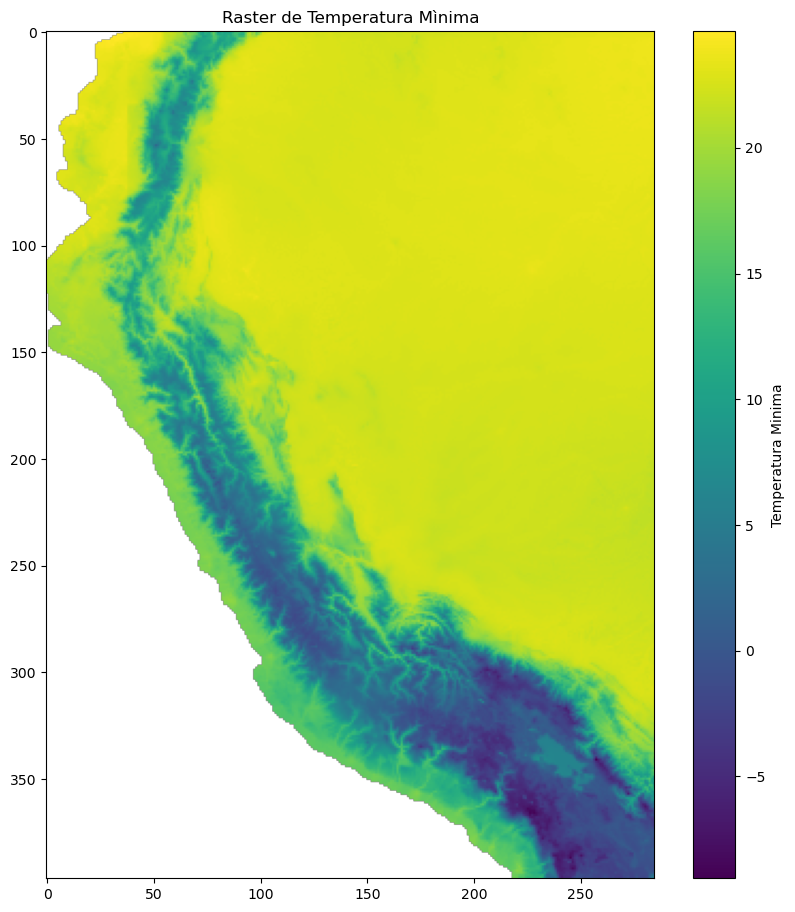

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 11))
plt.imshow(banda1, cmap='viridis')
plt.colorbar(label='Temperatura Minima')
plt.title("Raster de Temperatura Mìnima")
plt.show()


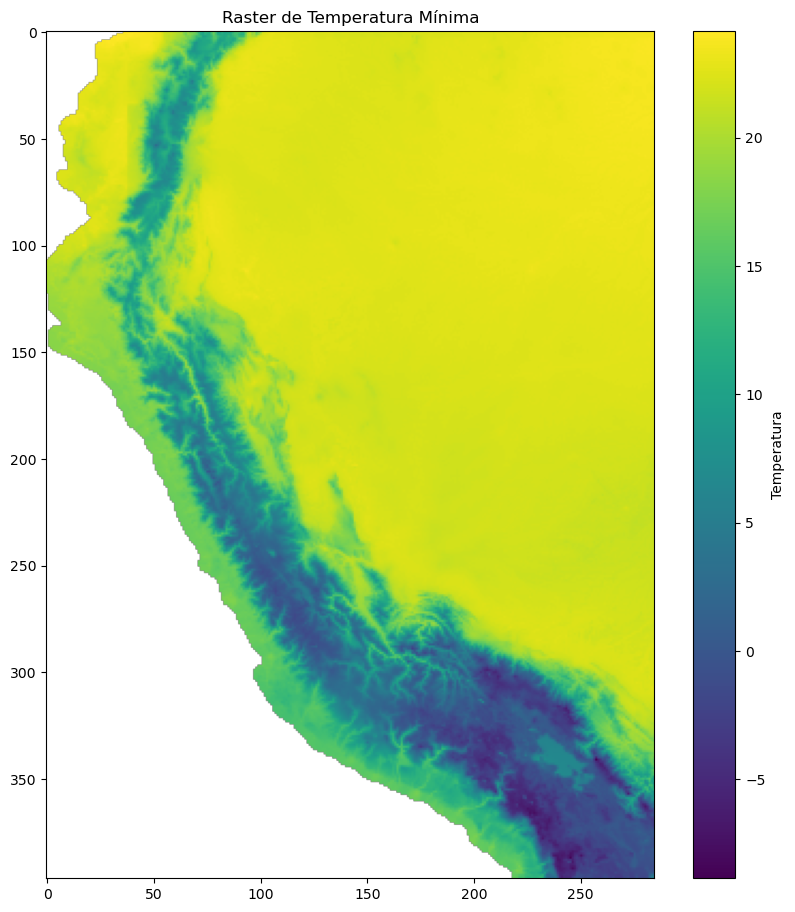

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 11))
plt.imshow(banda5, cmap='viridis')
plt.colorbar(label='Temperatura')
plt.title("Raster de Temperatura Mínima")
plt.show()

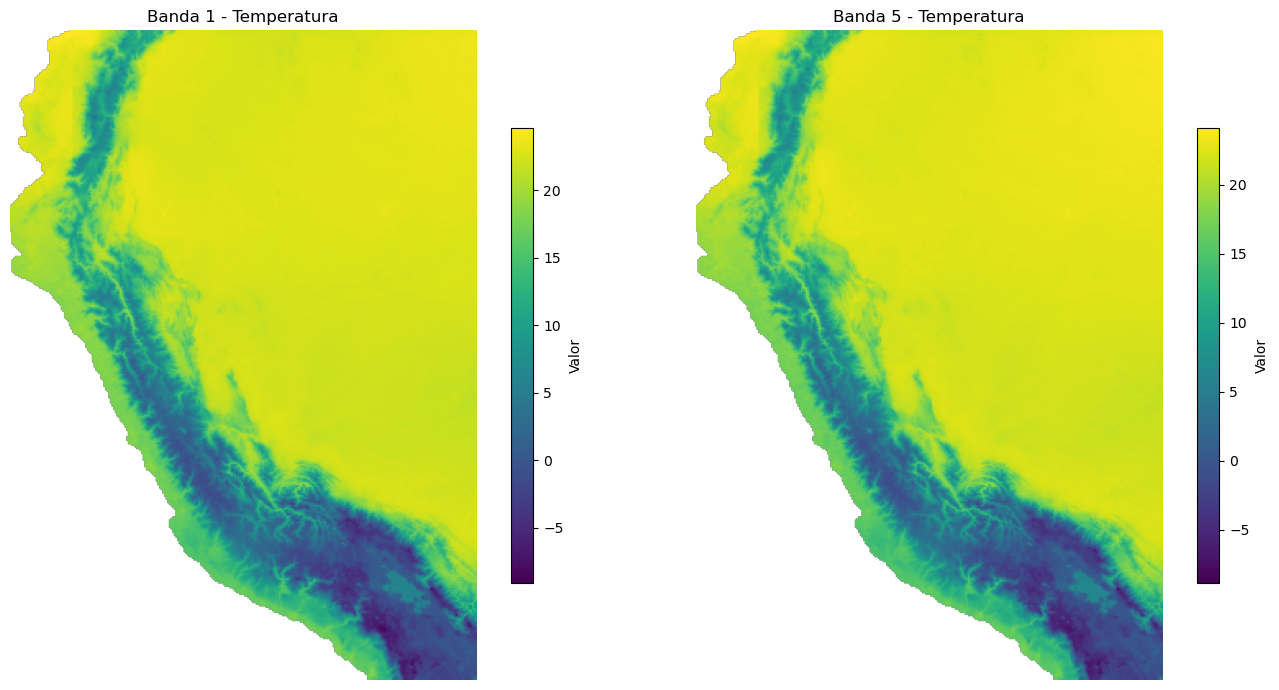

In [23]:
import rasterio
import matplotlib.pyplot as plt

# Ruta al archivo
#archivo = "Prec_raster.tif"

# Abrir el archivo y leer banda 1 y banda 5
with rasterio.open(archivo) as src:
    banda1 = src.read(1)
    banda5 = src.read(5)

# Mostrar ambas bandas lado a lado
plt.figure(figsize=(14, 7))

# Banda 1
plt.subplot(1, 2, 1)
plt.imshow(banda1, cmap='viridis')
plt.title("Banda 1 - Temperatura")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

# Banda 5
plt.subplot(1, 2, 2)
plt.imshow(banda5, cmap='viridis')
plt.title("Banda 5 - Temperatura")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

plt.tight_layout()
plt.show()


# Merge with data of Peru

In [52]:
# Reproyectar shapefile si es necesario (para que coincida con el raster)

#archivo = os.path.join("..", "data", "tmin_raster.tif")
with rasterio.open(archivo) as src:
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Recortar el raster usando el shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

# Actualizar metadata para el nuevo raster recortado
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el nuevo raster recortado (opcional)
with rasterio.open("recorte.tif", "w", **out_meta) as dest:
    dest.write(out_image)

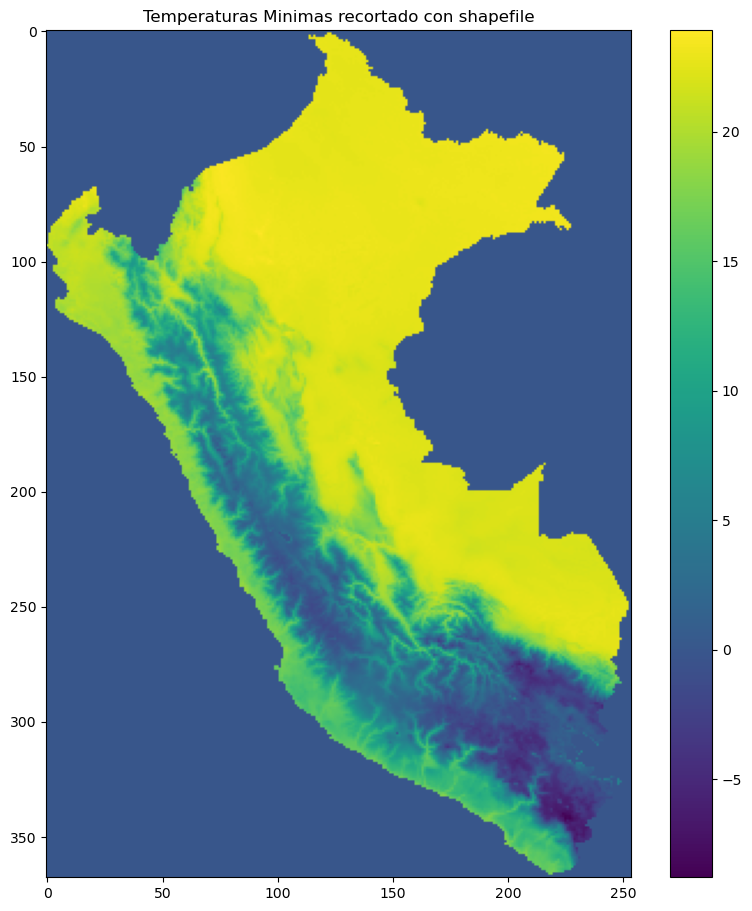

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 11))
plt.imshow(out_image[0], cmap='viridis')
plt.title("Temperaturas Minimas recortado con shapefile")
plt.colorbar()
plt.show()


In [54]:
# Filtrar los distritos que pertenecen a Loreto
loreto = gdf[gdf["DEPARTAMEN"] == "LORETO"]

# Unir todas las geometrías distritales en una sola para el recorte
loreto_union = loreto.unary_union


C:\Users\LIZETH\AppData\Local\Temp\ipykernel_1772\3560601552.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  loreto_union = loreto.unary_union


In [55]:
import rasterio
from rasterio.mask import mask

# Abrir el raster y recortar con Loreto
with rasterio.open(archivo) as src:
    # Asegurarse de que las proyecciones coincidan
    if loreto.crs != src.crs:
        loreto = loreto.to_crs(src.crs)
        loreto_union = loreto.unary_union

    out_image, out_transform = mask(src, [loreto_union], crop=True)
    out_meta = src.meta.copy()

# Actualizar metadatos del nuevo raster recortado
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el recorte como archivo nuevo (opcional)
with rasterio.open("recorte_loreto.tif", "w", **out_meta) as dest:
    dest.write(out_image)


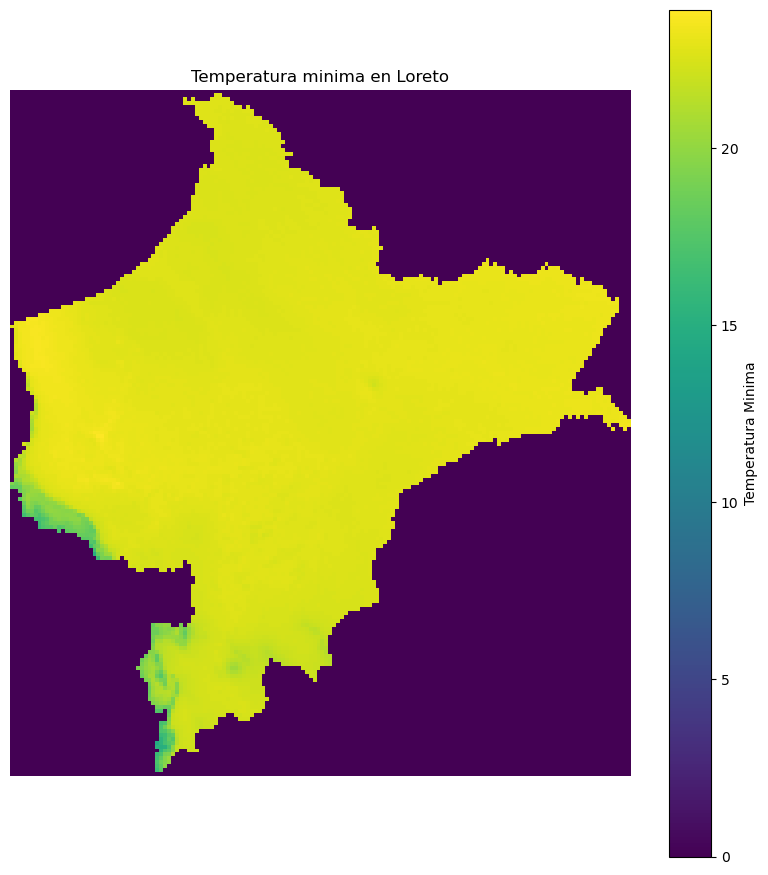

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 11))
plt.imshow(out_image[0], cmap="viridis")
plt.title("Temperatura minima en Loreto")
plt.colorbar(label="Temperatura Minima")
plt.axis("off")
plt.show()


✅ 1. Visualización de las 5 bandas (temperatura minima en el tiempo)

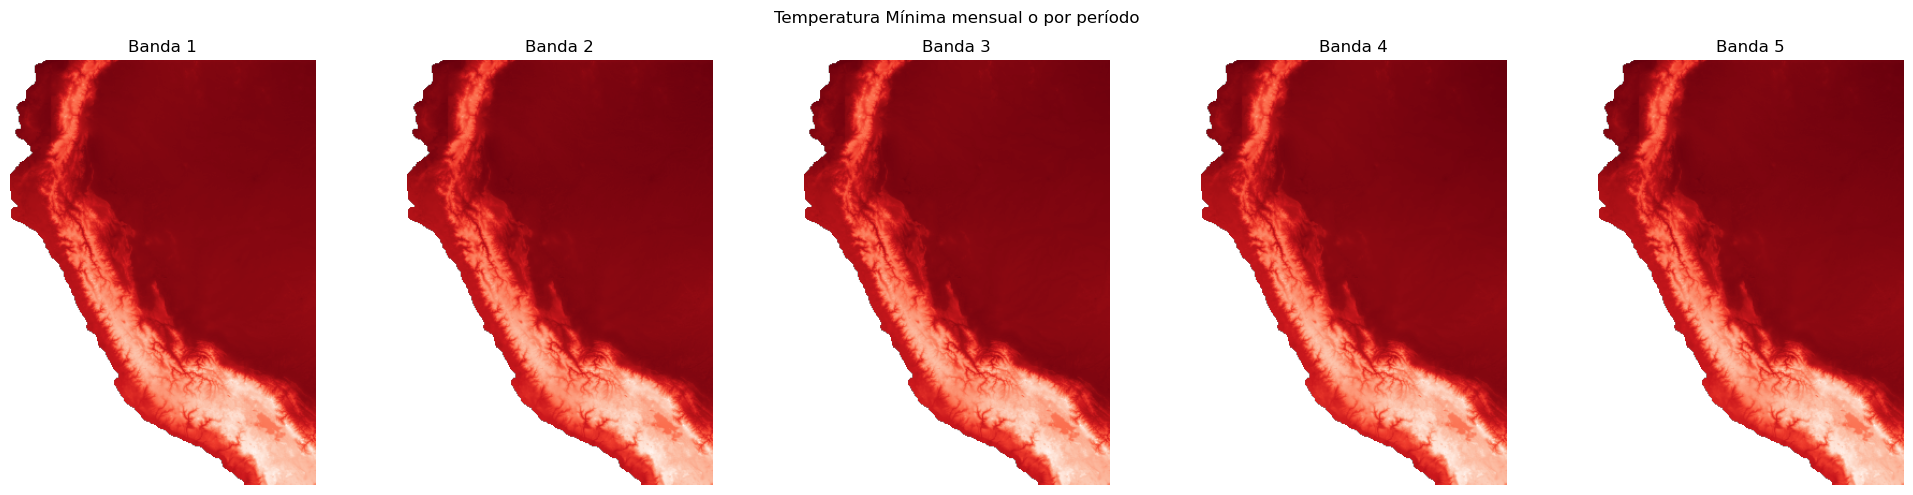

In [57]:
# Basado en la información proporcionada, sabemos que la columna con nombres es "DISTRITO"
nombre_columna = "DISTRITO"

# Visualizar el ráster original
with rasterio.open(archivo) as src:
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(1, 6):
        banda = src.read(i)
        axs[i-1].imshow(banda, cmap="Reds")
        axs[i-1].set_title(f"Banda {i}")
        axs[i-1].axis("off")
    plt.suptitle("Temperatura Mínima mensual o por período")
    plt.tight_layout()
    plt.show()


✅ 2. Recorte del ráster completo (las 5 bandas) a Perú usando los distritos

In [59]:
from rasterio.mask import mask

# Abrir y recortar todas las bandas del ráster
with rasterio.open(archivo) as src:
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el nuevo ráster recortado
with rasterio.open("tmin_peru_recortado.tif", "w", **out_meta) as dest:
    dest.write(out_image)


✅ 3. Calcular el promedio de temperaturas minimas en cada distrito a lo largo del tiempo

In [61]:
# Calcular estadísticas zonales por banda
promedios = []
for b in range(1, 6):
    stats = zonal_stats(gdf, archivo, stats=["mean"], band=b)
    promedios.append([s["mean"] for s in stats])

# Crear columnas para cada banda en el GeoDataFrame
for i, valores in enumerate(promedios):
    gdf[f"tmin_banda{i+1}"] = valores

# Calcular el promedio total de las 5 bandas
gdf["tmin_promedio_total"] = gdf[[f"tmin_banda{i+1}" for i in range(5)]].mean(axis=1)

# Mostrar resultados con los nombres de distritos
print(gdf[["DISTRITO", "tmin_promedio_total"]].head())



c:\Users\LIZETH\anaconda3\envs\geopandas\lib\site-packages\rasterstats\io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


                 DISTRITO  tmin_promedio_total
0         CODO DEL POZUZO            18.761000
1             TOURNAVISTA            22.048223
2  ALEXANDER VON HUMBOLDT            21.862907
3                 IRAZOLA            22.097315
4                 NESHUYA            21.937903


✅ 4. Clasificación de distritos según umbral de temperaturas


Columnas disponibles en el dataframe:
['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO', 'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry', 'tmin_banda1', 'tmin_banda2', 'tmin_banda3', 'tmin_banda4', 'tmin_banda5', 'tmin_promedio_total']


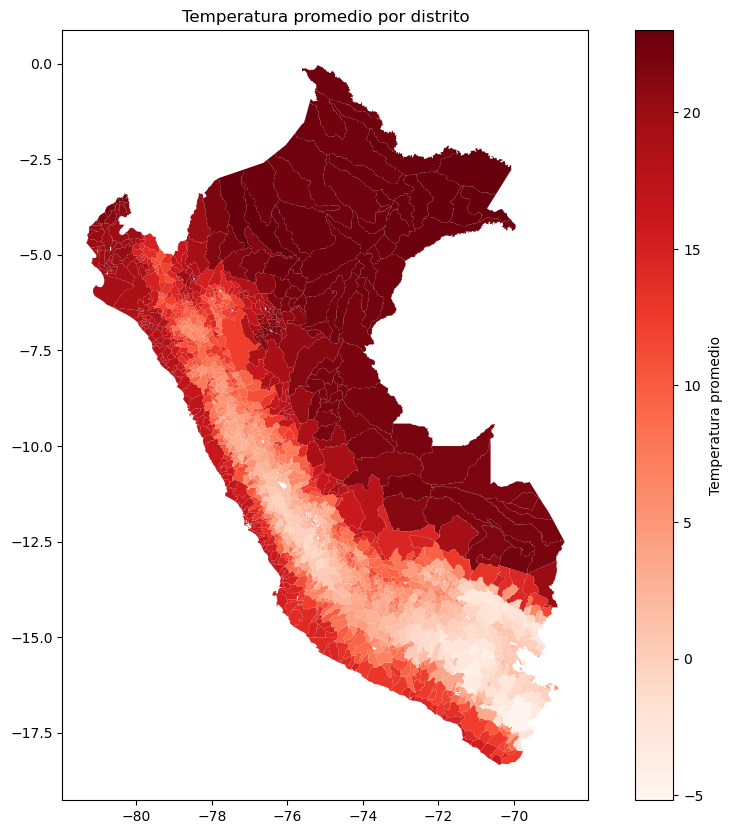

In [63]:
# Visualizar los resultados en un mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(column="tmin_promedio_total", 
         ax=ax, 
         legend=True, 
         cmap="Reds", 
         legend_kwds={'label': "Temperatura promedio"})
ax.set_title("Temperatura promedio por distrito")

# Primero, verifiquemos los nombres exactos de las columnas
print("\nColumnas disponibles en el dataframe:")
print(gdf.columns.tolist())


In [64]:
gdf.head()

IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry  tmin_banda1  \
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...    18.932154   
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...    22.290649   
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...    22.056366   
3  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...    22.263211   
4  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...    22.173068   

   tmin_banda2  tmin_banda3  tmin_banda4  tmin_banda5  tmin_promedio_total  
0    18.824931    18.862075    18.431692    18.754149            18.761000  
1    22.089505    22.105936    21.655648    22.099378            22.048223  
2    21.968923    21.955933    21.492676    21.840640            21.862907  
3    22.230315    22.169977    21.752044    22.071029            22.097315  
4    22.051399    22.033919    21.552995    21.878135            21.937903

In [65]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.gridspec import GridSpec

# Configuración para mejor visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [67]:
# Crear una columna de departamento para análisis si no existe
if 'DEPARTAMENTO' not in gdf.columns:
    if 'DEPARTAME' in gdf.columns:
        gdf['DEPARTAMENTO'] = gdf['DEPARTAME']
    elif 'IDDPTO' in gdf.columns:
        # Mapeo completo de códigos de departamento a nombres en Perú
        dpto_map = {
            '01': 'AMAZONAS',
            '02': 'ANCASH',
            '03': 'APURIMAC',
            '04': 'AREQUIPA',
            '05': 'AYACUCHO',
            '06': 'CAJAMARCA',
            '07': 'CALLAO',
            '08': 'CUSCO',
            '09': 'HUANCAVELICA',
            '10': 'HUANUCO',
            '11': 'ICA',
            '12': 'JUNIN',
            '13': 'LA LIBERTAD',
            '14': 'LAMBAYEQUE',
            '15': 'LIMA',
            '16': 'LORETO',
            '17': 'MADRE DE DIOS',
            '18': 'MOQUEGUA',
            '19': 'PASCO',
            '20': 'PIURA',
            '21': 'PUNO',
            '22': 'SAN MARTIN',
            '23': 'TACNA',
            '24': 'TUMBES',
            '25': 'UCAYALI'
        }
        # Aplicar el mapeo, asegurando que siempre hay un nombre de departamento
        gdf['DEPARTAMENTO'] = gdf['IDDPTO'].astype(str).map(lambda x: dpto_map.get(x, f"DPTO_{x}"))

# 1. Análisis Estadístico Básico
print("Estadísticas descriptivas de temperatura promedio:")
stats = gdf['tmin_promedio_total'].describe()
print(stats)

Estadísticas descriptivas de temperatura promedio:
count    1789.000000
mean        9.453099
std         6.878138
min        -5.191071
25%         3.943483
50%         8.477997
75%        15.129268
max        23.008980
Name: tmin_promedio_total, dtype: float64


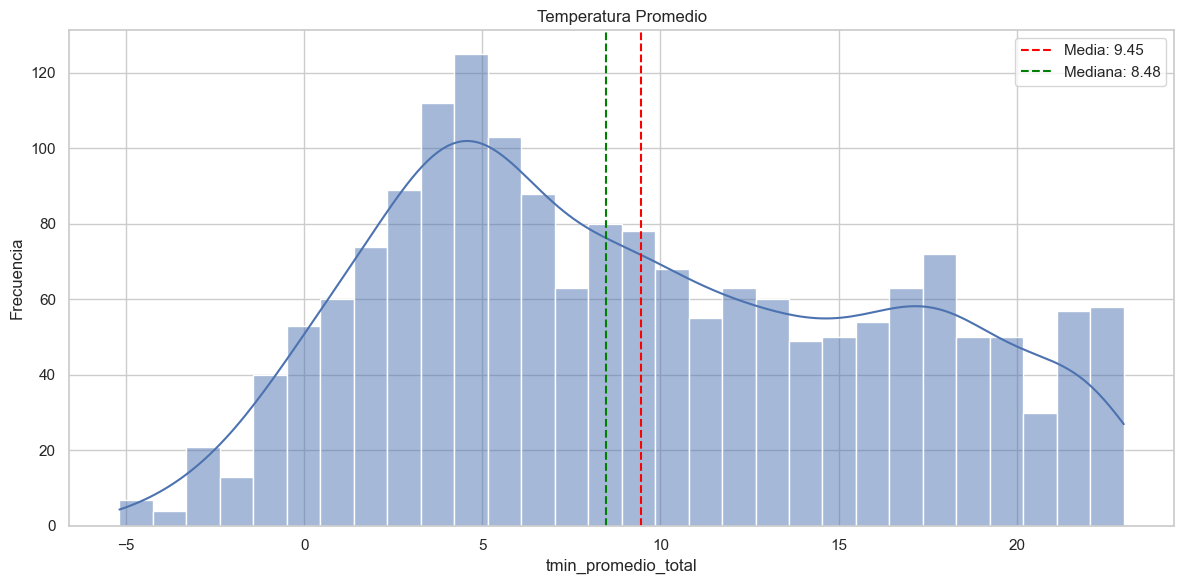

In [68]:
# 2. Histograma de Temperatura Promedio
plt.figure(figsize=(12, 6))
sns.histplot(gdf['tmin_promedio_total'], kde=True, bins=30)
plt.title('Temperatura Promedio')
plt.ylabel('Frecuencia')
plt.axvline(gdf['tmin_promedio_total'].mean(), color='red', linestyle='--', 
            label=f'Media: {gdf["tmin_promedio_total"].mean():.2f}')
plt.axvline(gdf['tmin_promedio_total'].median(), color='green', linestyle='--', 
            label=f'Mediana: {gdf["tmin_promedio_total"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('histograma_temperatura.png', dpi=300)
plt.show()

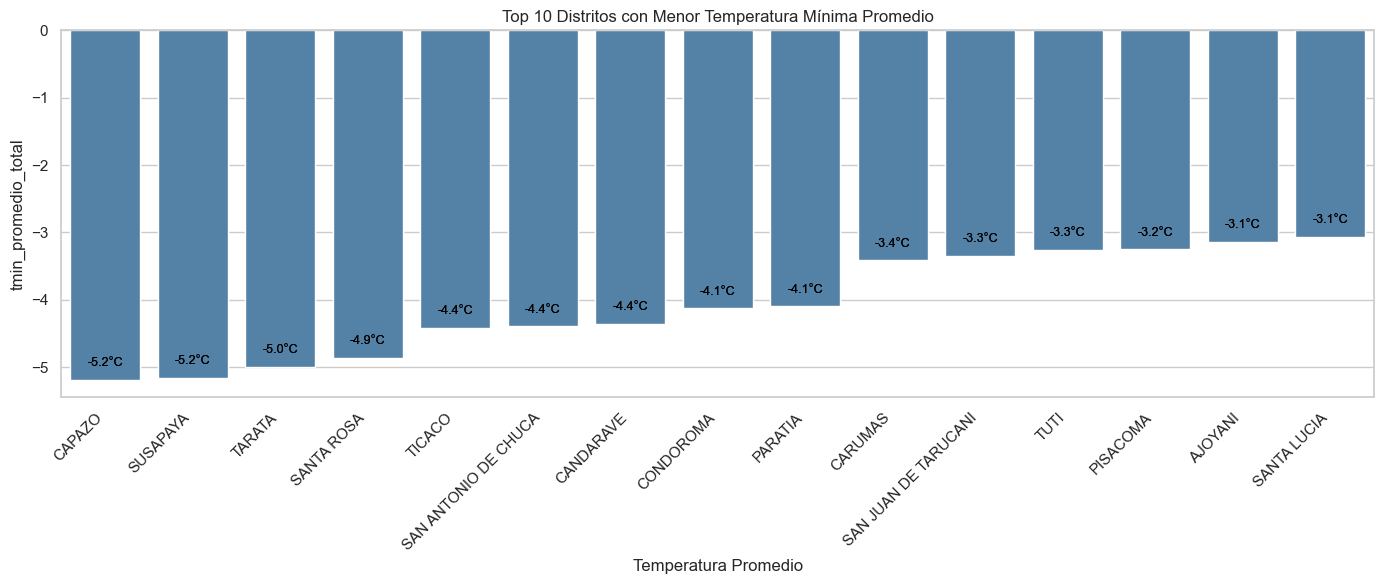

In [85]:
# 3. Top 15 distritos con menor temperatura minima: 15 distritos principales con Tmin medio más bajo (riesgo de heladas) 

top15 = gdf.sort_values(by='tmin_promedio_total').head(15)
plt.figure(figsize=(14, 6))
sns.barplot(x='DISTRITO', y='tmin_promedio_total', data=top15)
plt.title('Top 10 Distritos con Menor Temperatura Mínima Promedio')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Temperatura Promedio')
ax = sns.barplot(x='DISTRITO', y='tmin_promedio_total', data=top15, color='steelblue')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # posición horizontal centrada
        p.get_height() + 0.2,            # posición vertical un poco encima
        f"{p.get_height():.1f}°C",       # valor con un decimal
        ha='center', fontsize=9, color='black'
    )
plt.tight_layout()
plt.savefig('top15_distritos_menor_temperatura.png', dpi=300)
plt.show()

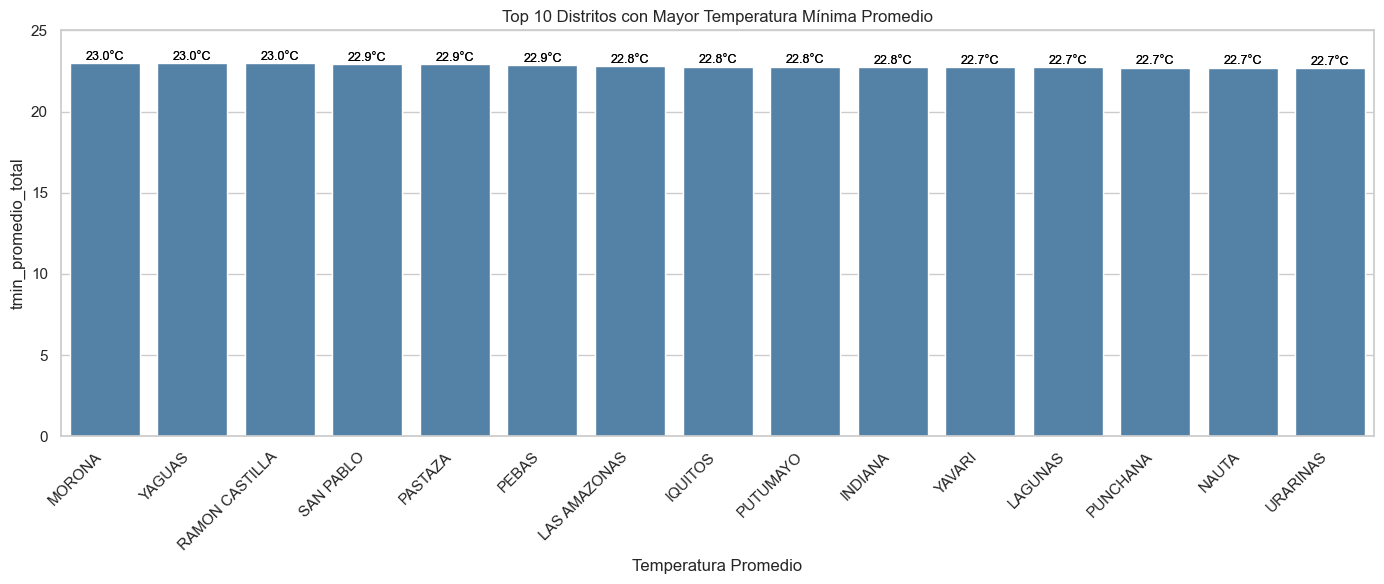

In [84]:
# 4. Top 15 distritos con mayor temperatura: 15 distritos principales con Tmin medio más alto .

top15 = gdf.sort_values(by='tmin_promedio_total', ascending=False).head(15)
plt.figure(figsize=(14, 6))
sns.barplot(x='DISTRITO', y='tmin_promedio_total', data=top15)
plt.title('Top 10 Distritos con Mayor Temperatura Mínima Promedio')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Temperatura Promedio')
plt.ylim(0, 25) 
ax = sns.barplot(x='DISTRITO', y='tmin_promedio_total', data=top15, color='steelblue')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # posición horizontal centrada
        p.get_height() + 0.2,            # posición vertical un poco encima
        f"{p.get_height():.1f}°C",       # valor con un decimal
        ha='center', fontsize=9, color='black'
    )
plt.tight_layout()
plt.savefig('top15_distritos_mayor_temperatura.png', dpi=300)

plt.show()

Mapa: coropleta estática con GeoPandas

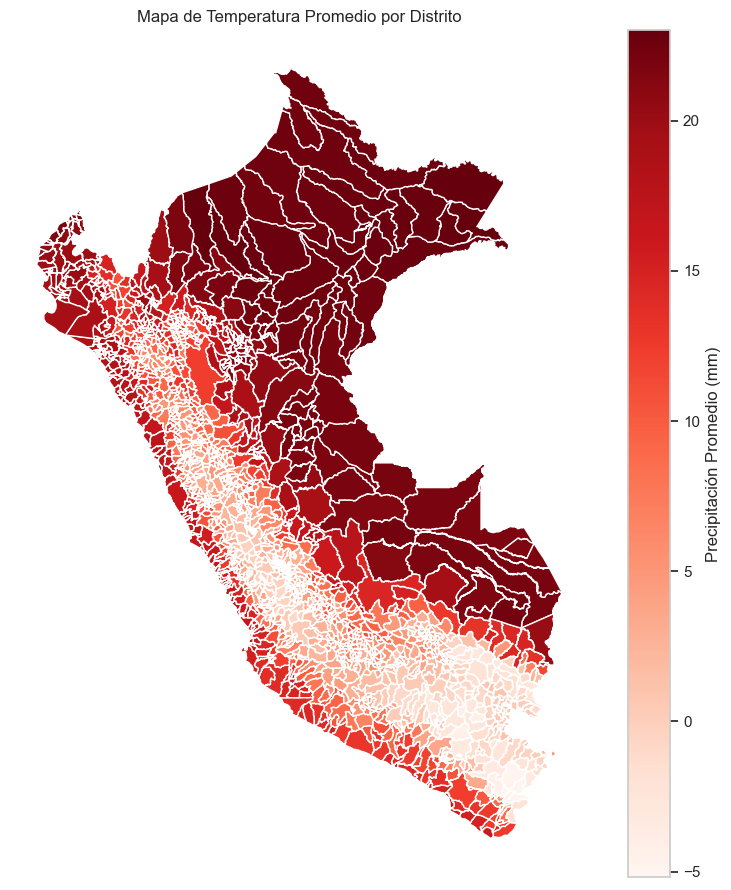

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 11))
gdf.plot(column='tmin_promedio_total', cmap='Reds', legend=True, 
         legend_kwds={'label': "Precipitación Promedio (mm)"},
         ax=ax)
ax.set_title('Mapa de Temperatura Promedio por Distrito')
ax.set_axis_off()
plt.savefig('mapa_temperatura.png', dpi=300, bbox_inches='tight')
plt.show()

In [93]:
# Seleccionar columnas relevantes
tabla_distrital = gdf[['IDDIST', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 
                       'tmin_promedio_total']].copy()

# Redondear la temperatura a 2 decimales
tabla_distrital['tmin_promedio_total'] = tabla_distrital['tmin_promedio_total'].round(2)

# Guardar en CSV
tabla_distrital.to_csv('tabla_tmin_distrital.csv', index=False, encoding='utf-8-sig')

print("Tabla resumen distrital guardada como 'tabla_tmin_distrital.csv'")
tabla_distrital.head()


Tabla resumen distrital guardada como 'tabla_tmin_distrital.csv'


IDDIST DEPARTAMENTO    PROVINCIA                DISTRITO  \
0  100902      HUANUCO  PUERTO INCA         CODO DEL POZUZO   
1  100904      HUANUCO  PUERTO INCA             TOURNAVISTA   
2  250305      UCAYALI   PADRE ABAD  ALEXANDER VON HUMBOLDT   
3  250302      UCAYALI   PADRE ABAD                 IRAZOLA   
4  250304      UCAYALI   PADRE ABAD                 NESHUYA   

   tmin_promedio_total  
0                18.76  
1                22.05  
2                21.86  
3                22.10  
4                21.94

In [94]:
# Agrupar por departamento y calcular estadísticas básicas
tabla_departamental = (
    gdf.groupby('DEPARTAMENTO')['tmin_promedio_total']
       .agg(['count', 'mean', 'min', 'max', 'std'])
       .reset_index()
)

# Redondear
tabla_departamental = tabla_departamental.round(2)

# Guardar CSV
tabla_departamental.to_csv('tabla_tmin_departamental.csv', index=False, encoding='utf-8-sig')

print("Tabla resumen departamental guardada como 'tabla_tmin_departamental.csv'")
tabla_departamental.head()


Tabla resumen departamental guardada como 'tabla_tmin_departamental.csv'


DEPARTAMENTO  count   mean   min    max   std
0     AMAZONAS     80  13.07  7.72  21.69  3.33
1       ANCASH    162   7.70  1.53  17.70  3.92
2     APURIMAC     83   5.41  0.56  11.73  2.67
3     AREQUIPA    102   6.83 -4.39  17.38  6.01
4     AYACUCHO    117   6.25  0.93  17.38  2.82

RASTER
> Este tipo de proyectos no solo permiten aplicar habilidades técnicas en programación, datos y SIG, sino que también abren la puerta a generar un impacto real en la sociedad. Al trabajar con datos ambientales, climáticos o territorialeS para contribuir con soluciones a problemas concretos que afectan a comunidades enteras, desde la agricultura hasta la gestión de riesgos.


# TIF OF TEMPERATURE

In [41]:
import rasterio

# Ruta al archivo
archivo = os.path.join("..", "data", "tmin_raster.tif")

# Abrir el archivo
with rasterio.open(archivo) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)


Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|


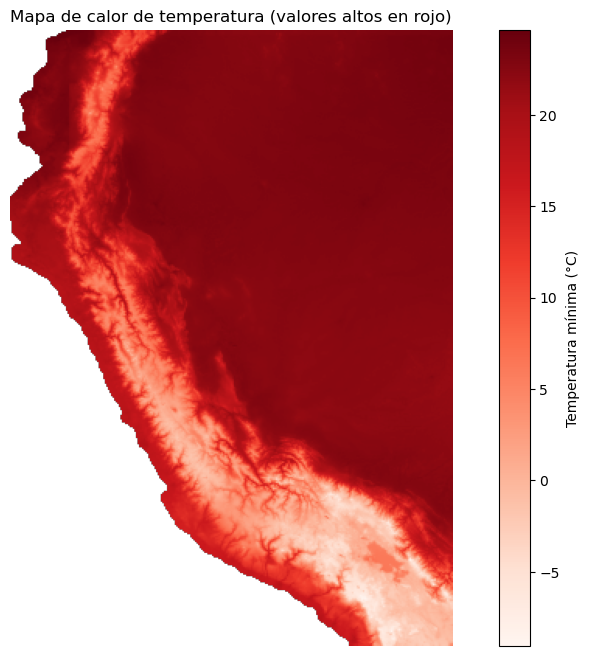

In [38]:
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
import rasterio

# Leer raster y obtener extensión geográfica
with rasterio.open(archivo) as src:
    extent = plotting_extent(src)
    banda1 = src.read(1)

# Mostrar mapa con colormap invertido (rojo = caliente)
plt.figure(figsize=(12, 8))
img = plt.imshow(banda1, cmap='Reds', extent=extent, origin='upper')  # 🔁 inferno_r = rojo para valores altos
cbar = plt.colorbar(img, label='Temperatura mínima (°C)')
plt.title("Mapa de calor de temperatura (valores altos en rojo)")
plt.axis("off")
plt.show()




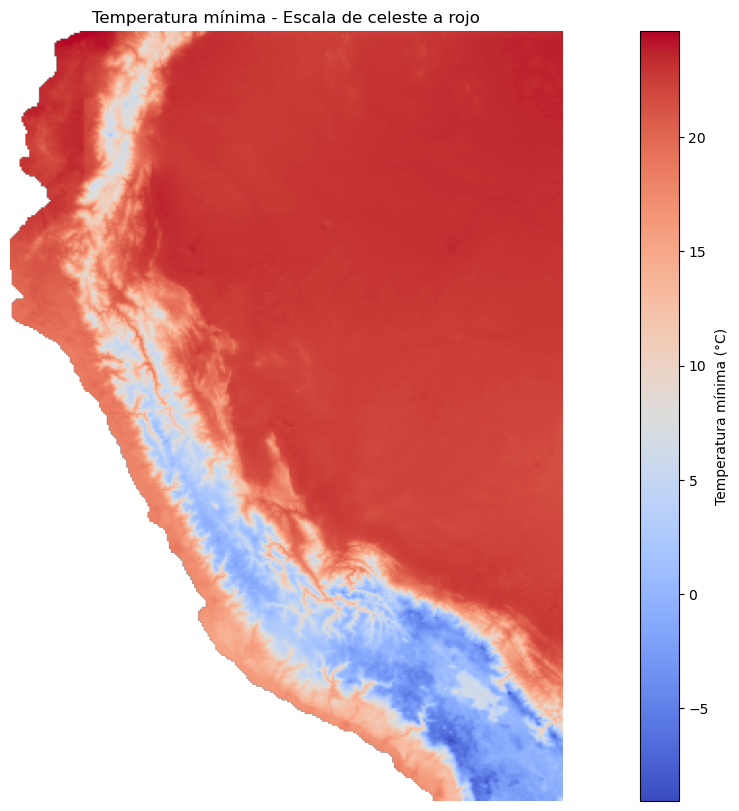

In [ ]:
plt.figure(figsize=(20, 10))
img = plt.imshow(banda1, cmap='coolwarm', extent=extent, origin='upper')
cbar = plt.colorbar(img, label='Temperatura mínima (°C)')
plt.title("Temperatura mínima - Escala de celeste a rojo")
plt.axis("off")
plt.show()


In [42]:
# Reproyectar shapefile si es necesario (para que coincida con el raster)

#archivo = os.path.join("..", "data", "tmin_raster.tif")
with rasterio.open(archivo) as src:
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Recortar el raster usando el shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

# Actualizar metadata para el nuevo raster recortado
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el nuevo raster recortado (opcional)
with rasterio.open("recorte.tif", "w", **out_meta) as dest:
    dest.write(out_image)



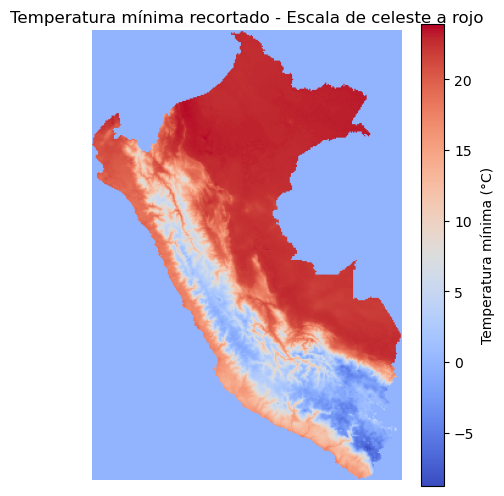

In [45]:
import matplotlib.pyplot as plt

with rasterio.open("recorte.tif") as src:
    extent = plotting_extent(src)
    banda1 = src.read(1)

plt.figure(figsize=(5, 6))
img = plt.imshow(banda1, cmap='coolwarm', extent=extent, origin='upper')
cbar = plt.colorbar(img, label='Temperatura mínima (°C)')
plt.title("Temperatura mínima recortado - Escala de celeste a rojo")
plt.axis("off")
plt.show()


# 3. 4 Medidas de Polìtica

Paso 1. Identificar zonas críticas

Filtra los distritos con Tmin ≤ percentil 10 (p10), que representan las zonas de mayor riesgo.

In [96]:
# Calcular el percentil 10 de Tmin
p10 = gdf['tmin_promedio_total'].quantile(0.10)

# Filtrar distritos críticos
zonas_criticas = gdf[gdf['tmin_promedio_total'] <= p10]
zonas_criticas[['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'tmin_promedio_total']].head()


DEPARTAMENTO  PROVINCIA   DISTRITO  tmin_promedio_total
39        TACNA     TARATA  TARUCACHI             0.728634
43        TACNA      TACNA      PALCA            -2.303472
49        TACNA     TARATA     TARATA            -4.995736
51        TACNA     TARATA     TICACO            -4.417395
55        TACNA  CANDARAVE    CAIRANI            -0.251786

In [ ]:
# Puedes contar cuántos distritos por departamento
zonas_criticas.groupby('DEPARTAMENTO')['DISTRITO'].count()


DEPARTAMENTO
APURIMAC         2
AREQUIPA        26
AYACUCHO         1
CUSCO           21
HUANCAVELICA    11
JUNIN           11
LIMA            15
MOQUEGUA         7
PASCO            1
PUNO            76
TACNA            8
Name: DISTRITO, dtype: int64

In [98]:
import numpy as np

# Listas de departamentos según tipo de fenómeno
heladas_altoandinas = [
    'PUNO', 'CUSCO', 'AYACUCHO', 'HUANCAVELICA',
    'PASCO', 'APURIMAC', 'JUNIN', 'AREQUIPA' ]

oleadas_frio_amazonico = [
    'LORETO', 'UCAYALI', 'MADRE DE DIOS']

# Crear una nueva columna "REGION_FRIO" según el departamento
gdf['REGION_FRIO'] = np.select(
    [
        gdf['DEPARTAMENTO'].isin(heladas_altoandinas),
        gdf['DEPARTAMENTO'].isin(oleadas_frio_amazonico)],
    [
        'HELADAS ALTOANDINAS',
        'OLEADAS DE FRÍO AMAZÓNICO'],
    default='OTRAS REGIONES')

# Verificar conteo por tipo de región
print(gdf['REGION_FRIO'].value_counts())

# Verificar algunos ejemplos
gdf[['DEPARTAMENTO', 'DISTRITO', 'tmin_promedio_total', 'REGION_FRIO']].head(10)


REGION_FRIO
OTRAS REGIONES               1006
HELADAS ALTOANDINAS           786
OLEADAS DE FRÍO AMAZÓNICO      81
Name: count, dtype: int64


DEPARTAMENTO                DISTRITO  tmin_promedio_total  \
0      HUANUCO         CODO DEL POZUZO            18.761000   
1      HUANUCO             TOURNAVISTA            22.048223   
2      UCAYALI  ALEXANDER VON HUMBOLDT            21.862907   
3      UCAYALI                 IRAZOLA            22.097315   
4      UCAYALI                 NESHUYA            21.937903   
5      UCAYALI              PADRE ABAD            20.078721   
6      UCAYALI                CURIMANA            22.027528   
7      HUANUCO             PUERTO INCA            21.585726   
8      UCAYALI           NUEVA REQUENA            22.053295   
9      UCAYALI              CAMPOVERDE            21.911208   

                 REGION_FRIO  
0             OTRAS REGIONES  
1             OTRAS REGIONES  
2  OLEADAS DE FRÍO AMAZÓNICO  
3  OLEADAS DE FRÍO AMAZÓNICO  
4  OLEADAS DE FRÍO AMAZÓNICO  
5  OLEADAS DE FRÍO AMAZÓNICO  
6  OLEADAS DE FRÍO AMAZÓNICO  
7             OTRAS REGIONES  
8  OLEADAS DE FRÍO AMAZÓNICO  
9  OLEADAS DE FRÍO AMAZÓNICO

In [99]:
# Distritos altoandinos
gdf_heladas = gdf[gdf['REGION_FRIO'] == 'HELADAS ALTOANDINAS']

# Distritos amazónicos
gdf_amazonas = gdf[gdf['REGION_FRIO'] == 'OLEADAS DE FRÍO AMAZÓNICO']


In [100]:
gdf_heladas.to_file("distritos_heladas.geojson", driver='GeoJSON')
gdf_amazonas.to_file("distritos_frio_amazonico.geojson", driver='GeoJSON')


In [95]:
import pandas as pd

politicas = pd.DataFrame({
    'Región': ['Altiplano (heladas)', 'Amazonía (frío)'],
    'Objetivo específico': [
        'Reducir IRAs y pérdidas ganaderas por heladas en zonas altoandinas',
        'Reducir IRAs y ausentismo escolar por oleadas de frío en la Amazonía'
    ],
    'Intervención': [
        'Viviendas térmicas ISUR, refugios ganaderos, kits contra heladas',
        'Refugios escolares, kits de abrigo, campañas médicas móviles'
    ],
    'Costo estimado (S/)': ['4,000/vivienda; 50,000/refugio', '2,000/aula; 500/kit'],
    'KPI': [
        '-20% IRAs; +10% supervivencia de alpacas',
        '-15% IRAs; +10% asistencia escolar'
    ]
})

politicas.to_csv('politicas_publicas_tmin.csv', index=False, encoding='utf-8-sig')
politicas


Región                                Objetivo específico  \
0  Altiplano (heladas)  Reducir IRAs y pérdidas ganaderas por heladas ...   
1      Amazonía (frío)  Reducir IRAs y ausentismo escolar por oleadas ...   

                                        Intervención  \
0  Viviendas térmicas ISUR, refugios ganaderos, k...   
1  Refugios escolares, kits de abrigo, campañas m...   

              Costo estimado (S/)                                       KPI  
0  4,000/vivienda; 50,000/refugio  -20% IRAs; +10% supervivencia de alpacas  
1             2,000/aula; 500/kit        -15% IRAs; +10% asistencia escolar

In [40]:
import rasterio

# Ruta al archivo
archivo2 = os.path.join("..", "data", "tmax_raster.tif")

# Abrir el archivo
with rasterio.open(archivo2) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)


Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|
